In [2]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("MIX_MF_young_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [3]:
data

['t_n61          2.2594 ( 1.7114,  2.9335) ( 1.6570,  2.8414)  1.1843 (Jnode 118)\n',
 't_n62          2.1619 ( 1.6160,  2.8202) ( 1.5816,  2.7733)  1.1917 (Jnode 117)\n',
 't_n63          2.0414 ( 1.5079,  2.6748) ( 1.4876,  2.6456)  1.1581 (Jnode 116)\n',
 't_n64          2.0107 ( 1.4799,  2.6407) ( 1.4613,  2.6069)  1.1456 (Jnode 115)\n',
 't_n65          1.9316 ( 1.4125,  2.5404) ( 1.3838,  2.5044)  1.1206 (Jnode 114)\n',
 't_n66          1.0313 ( 0.6147,  1.5058) ( 0.6057,  1.4943)  0.8886 (Jnode 113)\n',
 't_n67          0.9274 ( 0.5409,  1.3723) ( 0.5312,  1.3598)  0.8286 (Jnode 112)\n',
 't_n68          0.8386 ( 0.4805,  1.2629) ( 0.4558,  1.2309)  0.7752 (Jnode 111)\n',
 't_n69          0.7417 ( 0.3958,  1.1559) ( 0.3676,  1.1200)  0.7524 (Jnode 110)\n',
 't_n70          0.4424 ( 0.1553,  0.8410) ( 0.1230,  0.7814)  0.6584 (Jnode 109)\n',
 't_n71          0.2467 ( 0.0746,  0.5619) ( 0.0508,  0.5083)  0.4575 (Jnode 108)\n',
 't_n72          0.0960 ( 0.0063,  0.3150) ( 0.0000,  

In [4]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [5]:
model1_mean_times = {}
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    model1_mean_times[int(line[0][3:])] = float(line[1])
    model1_mean_times[int(line[0][3:])] = float(line[1])
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [6]:
node_name

['t_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',


In [7]:
posterior_mean_iqtree

[2.2594,
 2.1619,
 2.0414,
 2.0107,
 1.9316,
 1.0313,
 0.9274,
 0.8386,
 0.7417,
 0.4424,
 0.2467,
 0.096,
 0.5378,
 0.1638,
 0.1132,
 0.0796,
 0.0431,
 0.32,
 0.0928,
 0.4792,
 0.1909,
 1.5475,
 1.0731,
 0.7879,
 0.6357,
 0.3158,
 0.8604,
 0.8145,
 0.4762,
 0.2267,
 0.1621,
 0.078,
 0.3698,
 0.2736,
 0.4816,
 1.5064,
 0.78,
 0.6768,
 0.374,
 0.0221,
 0.5882,
 0.4455,
 0.1369,
 0.648,
 0.4207,
 0.5018,
 0.14,
 0.0489,
 0.0127,
 1.9299,
 1.8744,
 0.6859,
 0.1872,
 0.1469,
 0.0659,
 0.6653,
 0.3604,
 0.2477,
 0.063,
 2.2594,
 2.1619,
 2.0414,
 2.0107,
 1.9316,
 1.0313,
 0.9274,
 0.8386,
 0.7417,
 0.4424,
 0.2467,
 0.096,
 0.5378,
 0.1638,
 0.1132,
 0.0796,
 0.0431,
 0.32,
 0.0928,
 0.4792,
 0.1909,
 1.5475,
 1.0731,
 0.7879,
 0.6357,
 0.3158,
 0.8604,
 0.8145,
 0.4762,
 0.2267,
 0.1621,
 0.078,
 0.3698,
 0.2736,
 0.4816,
 1.5064,
 0.78,
 0.6768,
 0.374,
 0.0221,
 0.5882,
 0.4455,
 0.1369,
 0.648,
 0.4207,
 0.5018,
 0.14,
 0.0489,
 0.0127,
 1.9299,
 1.8744,
 0.6859,
 0.1872,
 0.1469,
 0.0

In [8]:
lower_ci_iqtree

[]

In [9]:
upper_ci_iqtree

[]

In [10]:
file_LG = open("GTR_G4_young_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

model2_mean_times = {}     
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    model2_mean_times[int(line[0][3:])] = float(line[1])
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [12]:
posterior_mean_baseml

[2.9713,
 1.4751,
 1.4265,
 1.3872,
 1.0655,
 0.567,
 0.4805,
 0.3159,
 0.0338,
 0.3915,
 0.2916,
 0.0792,
 0.4886,
 0.3357,
 0.3922,
 0.1148,
 0.0406,
 0.0105,
 1.2939,
 1.0353,
 0.7442,
 0.5686,
 0.2894,
 0.4681,
 0.6095,
 0.5701,
 0.3748,
 0.2109,
 0.1556,
 0.064,
 0.316,
 0.2366,
 0.3601,
 0.5167,
 0.4085,
 0.3148,
 0.1977,
 0.0722,
 0.0533,
 0.0395,
 0.0247,
 0.1317,
 0.0441,
 0.2908,
 0.1871,
 0.1157,
 0.0356,
 0.3118,
 0.1841,
 1.2155,
 1.1347,
 0.4581,
 0.1237,
 0.0974,
 0.0321,
 0.2352,
 0.1792,
 2.0273,
 0.9771]

In [13]:
posterior_mean_iqtree

[2.2594,
 2.1619,
 2.0414,
 2.0107,
 1.9316,
 1.0313,
 0.9274,
 0.8386,
 0.7417,
 0.4424,
 0.2467,
 0.096,
 0.5378,
 0.1638,
 0.1132,
 0.0796,
 0.0431,
 0.32,
 0.0928,
 0.4792,
 0.1909,
 1.5475,
 1.0731,
 0.7879,
 0.6357,
 0.3158,
 0.8604,
 0.8145,
 0.4762,
 0.2267,
 0.1621,
 0.078,
 0.3698,
 0.2736,
 0.4816,
 1.5064,
 0.78,
 0.6768,
 0.374,
 0.0221,
 0.5882,
 0.4455,
 0.1369,
 0.648,
 0.4207,
 0.5018,
 0.14,
 0.0489,
 0.0127,
 1.9299,
 1.8744,
 0.6859,
 0.1872,
 0.1469,
 0.0659,
 0.6653,
 0.3604,
 0.2477,
 0.063,
 2.2594,
 2.1619,
 2.0414,
 2.0107,
 1.9316,
 1.0313,
 0.9274,
 0.8386,
 0.7417,
 0.4424,
 0.2467,
 0.096,
 0.5378,
 0.1638,
 0.1132,
 0.0796,
 0.0431,
 0.32,
 0.0928,
 0.4792,
 0.1909,
 1.5475,
 1.0731,
 0.7879,
 0.6357,
 0.3158,
 0.8604,
 0.8145,
 0.4762,
 0.2267,
 0.1621,
 0.078,
 0.3698,
 0.2736,
 0.4816,
 1.5064,
 0.78,
 0.6768,
 0.374,
 0.0221,
 0.5882,
 0.4455,
 0.1369,
 0.648,
 0.4207,
 0.5018,
 0.14,
 0.0489,
 0.0127,
 1.9299,
 1.8744,
 0.6859,
 0.1872,
 0.1469,
 0.0

In [14]:
# # Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([-0.1,3], 
#         [-0.1, 3], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean age GTR+G4 [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age Partition MIX+MF [-Q] [100 Mya]', fontsize=18)
# # ax.set_title('Posterior mean age comparison between LG and Partition MF [-p] [t199 ~ B(10.3300,45.2000)]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./afrotheria_posterior_mean_age_comparison_partition_MIX_MF_p_middle_scatter.png')

In [15]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')

In [16]:
from ete3 import Tree
LG_G4_index_tree = "/home/piyumal/PHD/TimeTree/TreeMatching2/date_testing/Afrotheria/complex-model-analysis-v1/GTR_G4_index.tree"
LG_G4_C60_index_tree = "/home/piyumal/PHD/TimeTree/TreeMatching2/date_testing/Afrotheria/complex-model-analysis-v1/MIX_MF_index.tree"
# Load the tree using ETE3
tree1 = Tree(LG_G4_index_tree)
tree2 = Tree(LG_G4_C60_index_tree)


# Function to traverse the tree and populate the dictionary
def traverse_and_collect(node, clade_values):
    if not node.is_leaf():
        clade_name = node.name if node.name else "root"
        # Retrieve the support value (if exists)
        if clade_name == "root":
            clade_name = "root:1"
        support_value = node.support if node.support else None
        clade_values[clade_name] = support_value
        for child in node.get_children():
            # print(child)
            # print(child.get_leaf_names())
            child_names = child.get_leaf_names()
            cleaned_child_names = ["_".join(name.split('_')[1:]) for name in child_names]
            cleaned_child_names.sort()
            final_child_name = ":".join(cleaned_child_names)+":"+str(len(cleaned_child_names))
            support_value = node.support if node.support else None
            # print(support_value)
            clade_values[final_child_name] = support_value
            traverse_and_collect(child, clade_values)

In [17]:
# Start the traversal from the root
clade_values_tree1 = {}

traverse_and_collect(tree1, clade_values_tree1)

# Display the clade names with their associated values
for clade, value in clade_values_tree1.items():
    print(f"Clade: {clade}, Support Value: {value}")

Clade: root:1, Support Value: 119.0
Clade: amblysomus_corriae:amblysomus_hottentotus:amblysomus_marleyi:amblysomus_robustus:amblysomus_septentrionalis:calcochloris_obtusirostris:carpitalpa_arendsi:chlorotalpa_duthieae:chlorotalpa_sclateri:chrysochloris_asiatica:chrysochloris_stuhlmanni:chrysospalax_trevelyani:chrysospalax_villosus:cryptochloris_wintoni:dendrohyrax_dorsalis:dugong_dugon:echinops_telfairi:elephantulus_brachyrhynchus:elephantulus_edwardii:elephantulus_intufi:elephantulus_myurus:elephantulus_rufescens:elephantulus_rupestris:elephantulus_sp_vb001:elephas_maximus:elephas_maximus_indicus:eremitalpa_granti:geogale_aurita:hemicentetes_semispinosus:heterohyrax_brucei:limnogale_mergulus:loxodonta_africana:loxodonta_cyclotis:macroscelides_flavicaudatus:macroscelides_micus:macroscelides_proboscideus:microgale_brevicaudata:microgale_longicaudata:microgale_majori:microgale_principula:microgale_pusilla:microgale_talazaci:micropotamogale_lamottei:neamblysomus_gunningi:neamblysomus_juli

In [18]:
# Start the traversal from the root
clade_values_tree2 = {}

traverse_and_collect(tree2, clade_values_tree2)

# Display the clade names with their associated values
for clade, value in clade_values_tree2.items():
    print(f"Clade: {clade}, Support Value: {value}")

Clade: root:1, Support Value: 119.0
Clade: amblysomus_corriae:amblysomus_hottentotus:amblysomus_marleyi:amblysomus_robustus:amblysomus_septentrionalis:calcochloris_obtusirostris:carpitalpa_arendsi:chlorotalpa_duthieae:chlorotalpa_sclateri:chrysochloris_asiatica:chrysochloris_stuhlmanni:chrysospalax_trevelyani:chrysospalax_villosus:cryptochloris_wintoni:dendrohyrax_dorsalis:dugong_dugon:echinops_telfairi:elephantulus_brachyrhynchus:elephantulus_edwardii:elephantulus_intufi:elephantulus_myurus:elephantulus_rufescens:elephantulus_rupestris:elephantulus_sp_vb001:elephas_maximus:elephas_maximus_indicus:eremitalpa_granti:geogale_aurita:hemicentetes_semispinosus:heterohyrax_brucei:limnogale_mergulus:loxodonta_africana:loxodonta_cyclotis:macroscelides_flavicaudatus:macroscelides_micus:macroscelides_proboscideus:microgale_brevicaudata:microgale_longicaudata:microgale_majori:microgale_principula:microgale_pusilla:microgale_talazaci:micropotamogale_lamottei:neamblysomus_gunningi:neamblysomus_juli

In [19]:
diff_indexes = []
for clade, value in clade_values_tree1.items():
    names = clade.split(":")
    len_of_clade = int(names[-1])
    for clade2, value2 in clade_values_tree2.items():
        names2 = clade2.split(":")
        len_of_clade2 = int(names2[-1])
        if clade == clade2 and value != value2:
           print(f"Clade: {clade}, Support Value LG_G4: {value}, Support Value LG_G4_C60: {value2}")
           diff_indexes.append([int(value), int(value2)])

Clade: elephantulus_brachyrhynchus:elephantulus_edwardii:elephantulus_intufi:elephantulus_myurus:elephantulus_rufescens:elephantulus_rupestris:elephantulus_sp_vb001:macroscelides_flavicaudatus:macroscelides_micus:macroscelides_proboscideus:petrodromus_tetradactylus:petrosaltator_rozeti:12, Support Value LG_G4: 65.0, Support Value LG_G4_C60: 96.0
Clade: elephantulus_brachyrhynchus:elephantulus_edwardii:elephantulus_intufi:elephantulus_myurus:elephantulus_rufescens:elephantulus_rupestris:elephantulus_sp_vb001:7, Support Value LG_G4: 66.0, Support Value LG_G4_C60: 97.0
Clade: elephantulus_edwardii:elephantulus_myurus:elephantulus_sp_vb001:3, Support Value LG_G4: 67.0, Support Value LG_G4_C60: 98.0
Clade: elephantulus_edwardii:1, Support Value LG_G4: 68.0, Support Value LG_G4_C60: 99.0
Clade: elephantulus_myurus:elephantulus_sp_vb001:2, Support Value LG_G4: 68.0, Support Value LG_G4_C60: 99.0
Clade: elephantulus_sp_vb001:1, Support Value LG_G4: 69.0, Support Value LG_G4_C60: 100.0
Clade: e

In [20]:
diff_indexes

[[65, 96],
 [66, 97],
 [67, 98],
 [68, 99],
 [68, 99],
 [69, 100],
 [69, 100],
 [67, 98],
 [70, 101],
 [71, 102],
 [71, 102],
 [70, 101],
 [72, 103],
 [72, 103],
 [66, 97],
 [73, 104],
 [74, 105],
 [74, 105],
 [73, 104],
 [75, 106],
 [76, 107],
 [76, 107],
 [75, 106],
 [65, 96],
 [77, 108],
 [77, 108],
 [78, 109],
 [78, 109],
 [79, 65],
 [80, 82],
 [81, 83],
 [82, 84],
 [83, 86],
 [83, 86],
 [82, 84],
 [84, 85],
 [84, 85],
 [81, 83],
 [85, 87],
 [86, 88],
 [87, 89],
 [88, 90],
 [89, 91],
 [90, 92],
 [90, 92],
 [89, 91],
 [88, 90],
 [87, 89],
 [91, 93],
 [92, 94],
 [92, 94],
 [91, 93],
 [86, 88],
 [85, 87],
 [80, 82],
 [93, 95],
 [93, 95],
 [79, 65],
 [94, 66],
 [95, 67],
 [96, 68],
 [97, 73],
 [98, 74],
 [99, 75],
 [100, 76],
 [101, 77],
 [101, 77],
 [100, 76],
 [99, 75],
 [98, 74],
 [97, 73],
 [102, 78],
 [103, 79],
 [103, 79],
 [102, 78],
 [96, 68],
 [104, 69],
 [105, 70],
 [106, 71],
 [106, 71],
 [105, 70],
 [104, 69],
 [107, 72],
 [107, 72],
 [95, 67],
 [94, 66],
 [108, 80],
 [109,

In [21]:
unique_data = [list(t) for t in set(tuple(inner) for inner in diff_indexes)]

# Print the result
print(unique_data)

[[82, 84], [66, 97], [75, 106], [76, 107], [87, 89], [105, 70], [71, 102], [72, 103], [92, 94], [99, 75], [67, 98], [77, 108], [93, 95], [88, 90], [106, 71], [68, 99], [94, 66], [100, 76], [80, 82], [89, 91], [107, 72], [73, 104], [79, 65], [108, 80], [85, 87], [101, 77], [95, 67], [69, 100], [78, 109], [65, 96], [74, 105], [81, 83], [90, 92], [97, 73], [84, 85], [109, 81], [86, 88], [102, 78], [96, 68], [91, 93], [98, 74], [70, 101], [83, 86], [104, 69], [103, 79]]


In [22]:
model2_keys = [i[0] for i in unique_data]
model1_keys = [i[1] for i in unique_data]

In [23]:
mapped_keys = {}
for i in range(len(model2_keys)):
    mapped_keys[model2_keys[i]] = model1_keys[i]

In [24]:
model1_revised_times = {}
for key, value in model1_mean_times.items():
    if key in model1_keys:
        model1_revised_times[key] = model1_mean_times[mapped_keys[key]]
    else:
        model1_revised_times[key] = value

In [25]:
model1_mean_posterior_times = np.array(list(model1_revised_times.values()))
model2_mean_posterior_times = np.array(list(model2_mean_times.values()))

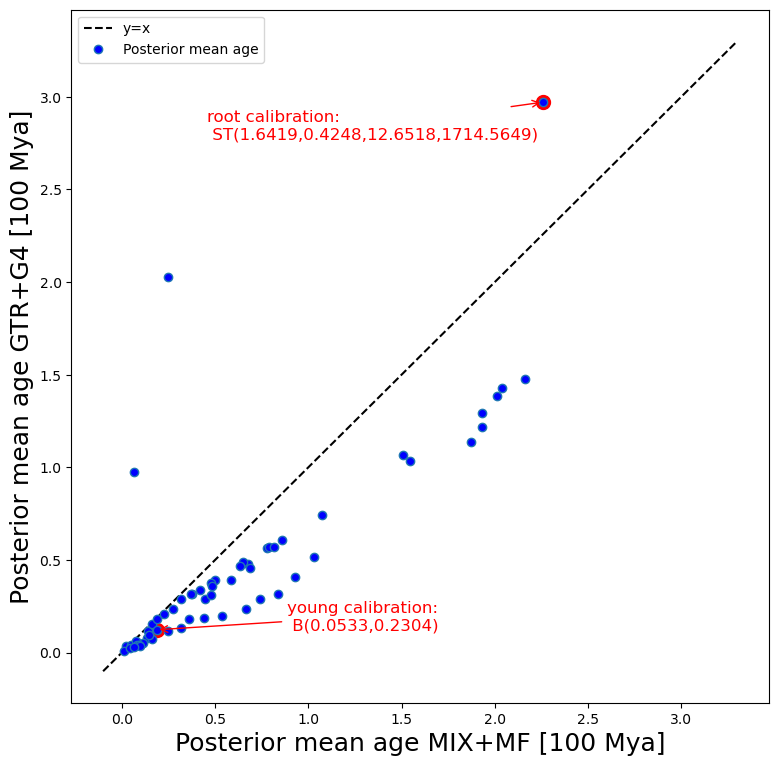

In [27]:
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,3.3], 
        [-0.1, 3.3], 
        'k--', label='y=x')
points = ax.plot(model1_mean_posterior_times, model2_mean_posterior_times, 'o', label='Posterior mean age')
points[0].set_markerfacecolor('blue')
# points[23].set_markerfacecolor('blue')# Set default face color (for other points)

# Now plot the highlighted point with a different color
ax.scatter(posterior_mean_iqtree[0], posterior_mean_baseml[0], color='red', s=100)
ax.scatter(posterior_mean_iqtree[-7], posterior_mean_baseml[-7], color='red', s=100)
# ax.scatter(posterior_mean_iqtree[0], posterior_mean_baseml[0], color='red', label='Root age')
ax.annotate('root calibration:\n ST(1.6419,0.4248,12.6518,1714.5649)', 
        xy=(posterior_mean_iqtree[0], posterior_mean_baseml[0]), 
        xytext=(posterior_mean_iqtree[0]-1.8,  posterior_mean_baseml[0]-0.2 ),  # Offset position for the label
        arrowprops=dict(arrowstyle='->', color='red'),  # Arrow style
        fontsize=12, color='red') 
ax.annotate('young calibration:\n B(0.0533,0.2304)', 
        xy=(posterior_mean_iqtree[-7], posterior_mean_baseml[-7]), 
        xytext=(posterior_mean_iqtree[-7]+0.7 ,  posterior_mean_baseml[-7] ),  # Offset position for the label
        arrowprops=dict(arrowstyle='->', color='red'),  # Arrow style
        fontsize=12, color='red') 
# Labels and title
ax.set_xlabel('Posterior mean age MIX+MF [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age GTR+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4+C60 [t199 ~ B(10.3300,45.2000)]')
ax.legend()

plt.savefig('./afrotheria_mix_mf_young_scatter.png')